In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
# Load the dataset into the variable customer_df
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')


In [5]:
# First look at its main features
print(customer_df.head())
print(customer_df.shape)
print(customer_df.info())

  Customer       State  Customer Lifetime Value Response  Coverage Education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  Effective To Date EmploymentStatus Gender  Income  ...  \
0           2/24/11         Employed      F   56274  ...   
1           1/31/11       Unemployed      F       0  ...   
2           2/19/11         Employed      F   48767  ...   
3           1/20/11       Unemployed      M       0  ...   
4            2/3/11         Employed      M   43836  ...   

  Months Since Policy Inception Number of Open Complaints  Number of Policies  \
0                             5                         0                   1

In [6]:
# Rename columns to snake_case
customer_df.columns = customer_df.columns.str.lower().str.replace(' ', '_')

# Change effective_to_date column to datetime format
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])

# Create a NEW dataframe using only the numerical data called numerical_df
numerical_df = customer_df.select_dtypes(include=[np.number])


In [7]:
# Define a function to differentiate between continuous and discrete variables
def variable_type(df):
    continuous_vars = []
    discrete_vars = []
    for col in df.columns:
        if df[col].nunique() > 100:  # You can adjust this threshold as needed
            continuous_vars.append(col)
        else:
            discrete_vars.append(col)
    return continuous_vars, discrete_vars


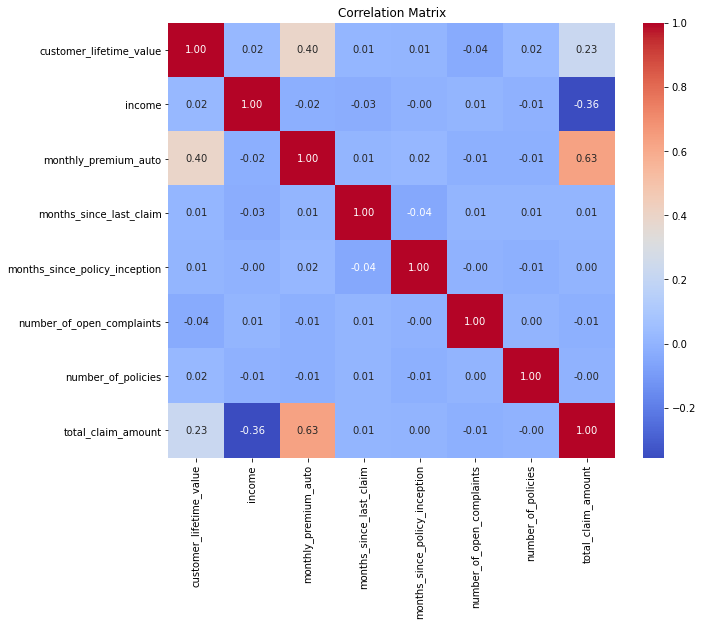

In [8]:
# Apply the function to the numerical_df
continuous_df, discrete_df = variable_type(numerical_df)

# Plot a correlation matrix
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [9]:
# Create a function to plot every discrete variable
def plot_discrete_vars(df, discrete_vars):
    for var in discrete_vars:
        sns.countplot(x=var, data=df)
        plt.title(f'Distribution of {var}')
        plt.show()

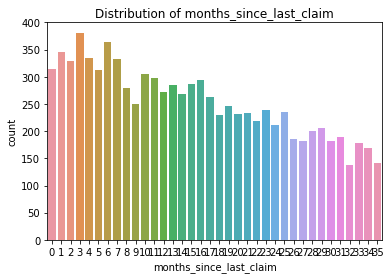

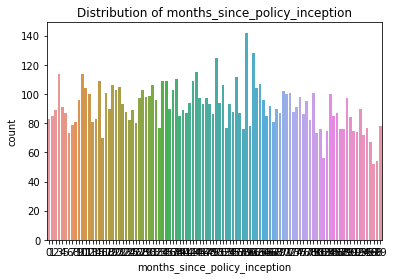

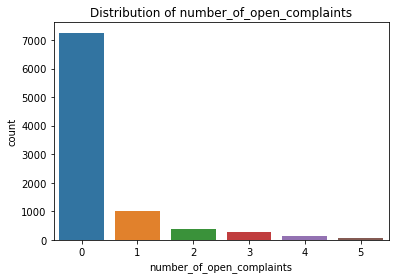

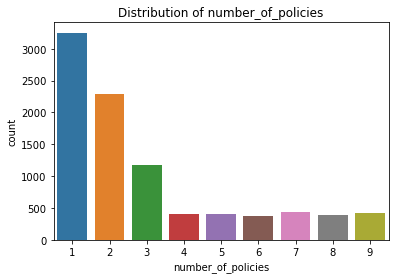

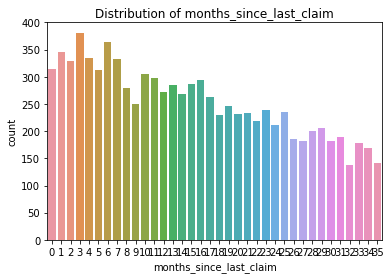

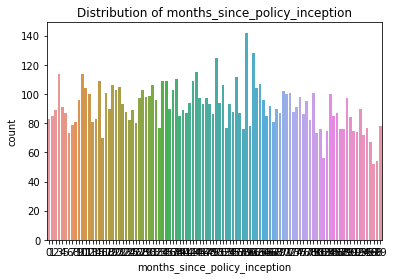

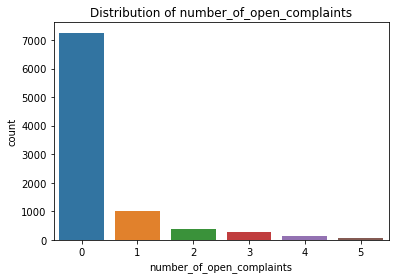

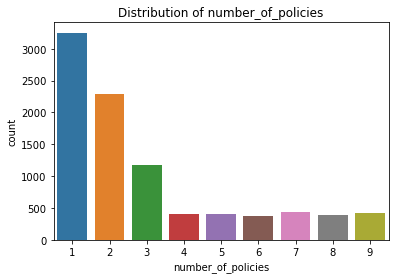

In [11]:
 plot_discrete_vars(customer_df, discrete_df)
plot_discrete_vars(customer_df, discrete_df)

# Create a function to plot every continuous variable
def plot_continuous_vars(df, continuous_vars):
    for var in continuous_vars:
        sns.histplot(df[var], bins=30, kde=True)
        plt.title(f'Distribution of {var}')
        plt.show()

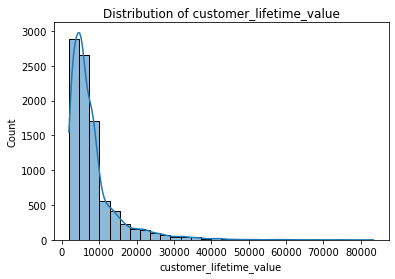

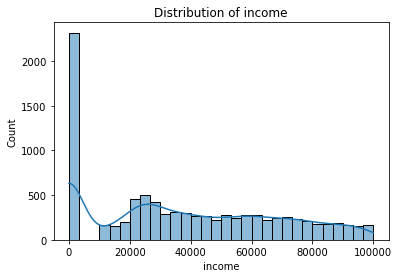

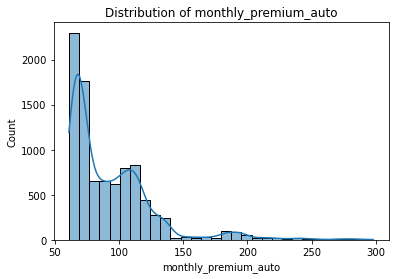

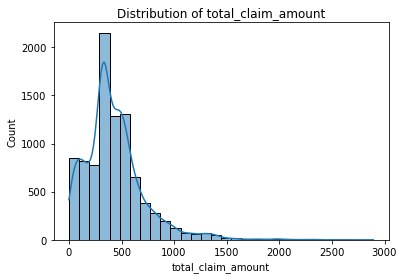

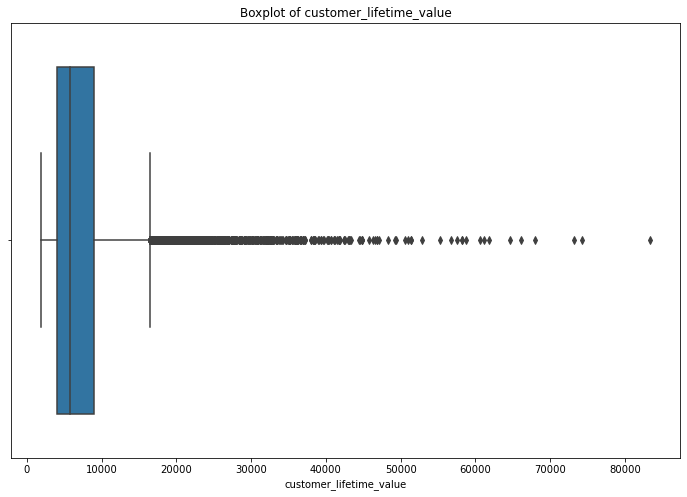

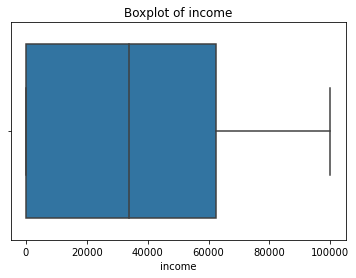

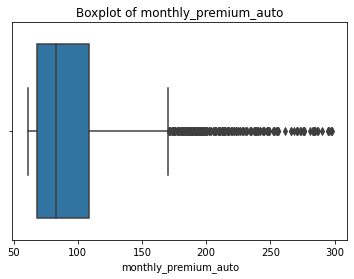

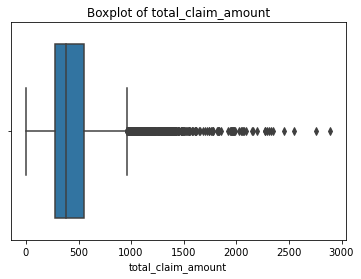

In [18]:
# Plot every continuous variable
plot_continuous_vars(customer_df, continuous_df)

    
    # Look for outliers in the continuous variables
plt.figure(figsize=(12, 8))
for var in continuous_df:
    sns.boxplot(x=numerical_df[var])
    plt.title(f'Boxplot of {var}')
    plt.show()

In [26]:


continuous_df, discrete_df = variable_type(numerical_df)
# Convert continuous variables to numeric (in case they are not)
numerical_df[continuous_df] = numerical_df[continuous_df].apply(pd.to_numeric, errors='coerce')

# Calculate Z-scores
z_scores = np.abs(stats.zscore(numerical_df[continuous_df].dropna()))

# Identify outliers
outliers = (z_scores > 3).all(axis=1)

# Remove outliers from the main dataframe
customer_df = customer_df[~outliers]


In [17]:
# Check all columns for NaN values
print(customer_df.isnull().sum())

# Save the numerical_df to csv as numerical.csv
numerical_df.to_csv('numerical.csv', index=False)


customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64
